In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random
import seaborn as sns
from sklearn import preprocessing
from sklearn import cross_decomposition
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set()

# Make charts a bit bolder
#sns.set_context("talk")

%matplotlib inline

# Default figure size
sns.set(rc={"figure.figsize": (12, 6)})

# This actually makes autocomplete WAY faster ...
%config Completer.use_jedi = False

# Show only 2 decimals for floating point numbers
pd.options.display.float_format = "{:.2f}".format

sns.set_style('whitegrid')

In [3]:
eth = pd.read_csv('Eth.csv')
eth.head()
del eth['Unnamed: 0']
eth.head()
eth['volume_ETH'] = eth['Volume ETH']
eth['volume_USDT'] = eth['Volume USDT'] 
eth = eth[['date', 'open', 'high', 'low', 'close', 'volume_ETH', 'volume_USDT']]
eth.head(3)
eth['date'] = pd.to_datetime(eth['date'])
eth.tail()

,date,open,high,low,close,volume_ETH,volume_USDT
1476,2017-08-21,299.10,346.52,294.60,323.29,5134.54,1661944.36
1477,2017-08-20,290.91,300.53,282.85,299.10,2469.49,730800.66
1478,2017-08-19,293.96,299.90,278.00,290.91,2140.08,618248.58
1479,2017-08-18,302.00,311.79,283.94,293.96,9392.79,2815460.24
1480,2017-08-17,303.61,312.18,298.21,302.00,6155.32,1890017.53


In [4]:
eth.dtypes

date           datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
volume_ETH            float64
volume_USDT           float64
dtype: object

In [5]:
eth.shape

(1481, 7)

In [6]:
eth.dropna()
eth = eth.sort_values(by = 'date')
eth.head()
eth = eth.reset_index()
del eth['index']


eth.tail()

eth.head(3)
eth['return'] = eth['close'].pct_change()

In [7]:
eth.describe()


,open,high,low,close,volume_ETH,volume_USDT,return
count,1481.00,1481.00,1481.00,1481.00,1481.00,1481.00,1480.00
mean,645.75,673.22,614.84,648.27,550337.92,485656094.52,0.00
std,790.94,827.25,751.76,795.57,532893.19,993503550.06,0.05
min,83.75,85.00,81.79,83.76,1054.54,301038.78,-0.45
25%,187.45,192.74,181.53,187.45,176029.10,47636043.35,-0.02
50%,298.64,309.69,287.00,298.64,410969.86,96199378.54,0.00
75%,643.41,686.82,615.26,645.09,768921.78,301406126.46,0.03
max,4173.46,4372.72,3913.62,4173.45,4663239.93,11641524166.99,0.26


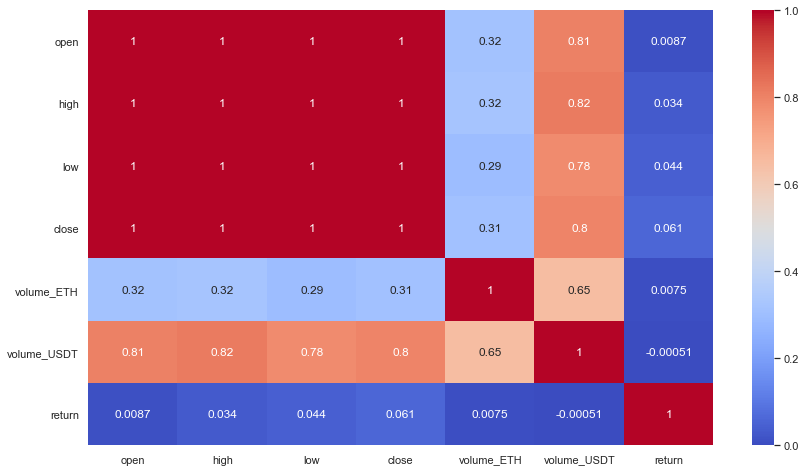

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(eth.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);



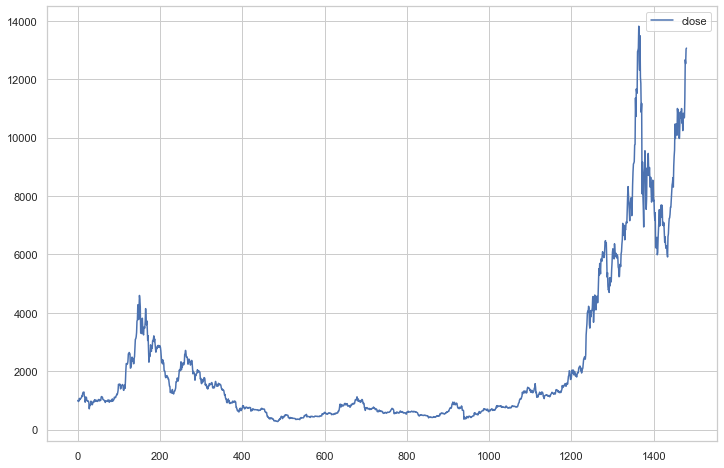

In [9]:
#return on investment function I found online, not exactly sure what to make of this.
def plot_roi(amount, df):
    
    ((amount / df.iloc[0]) * df).plot(figsize=(12,8))

plot_roi(1000, eth[['close']])

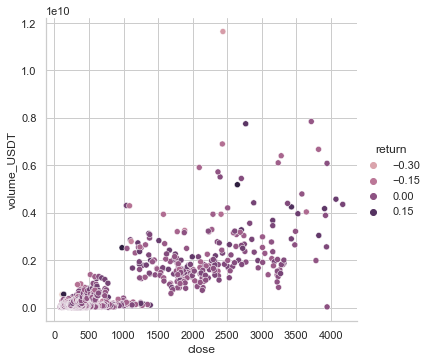

In [10]:
sns.relplot(x = 'close', y = 'volume_USDT', data = eth, kind = 'scatter', hue = 'return')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

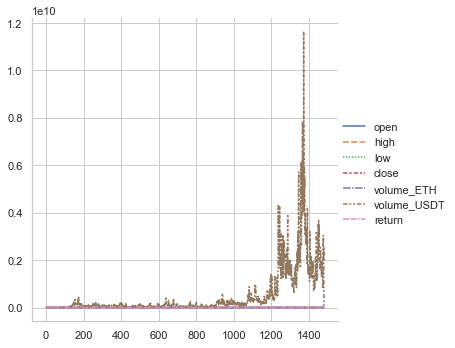

In [11]:

sns.relplot(data=eth, kind = 'line')
plt.show

In [12]:
np.mean(eth['return'])

0.0032337788332983167

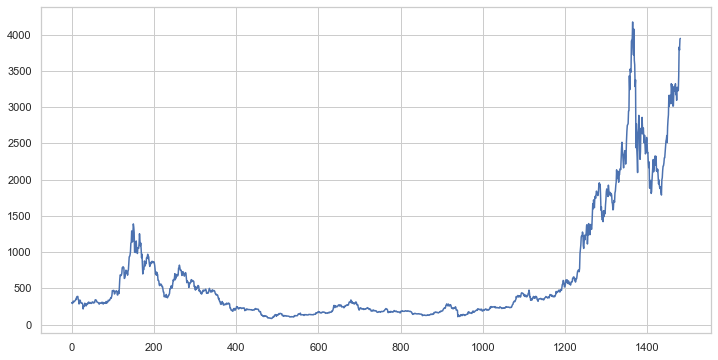

In [13]:
ax1 = eth['close'].plot(style =['-'])

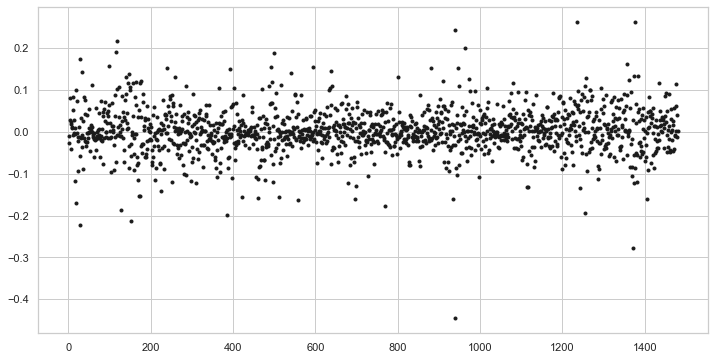

In [14]:
ax2 = eth['return'].plot(style = ['k.'])

<AxesSubplot:>

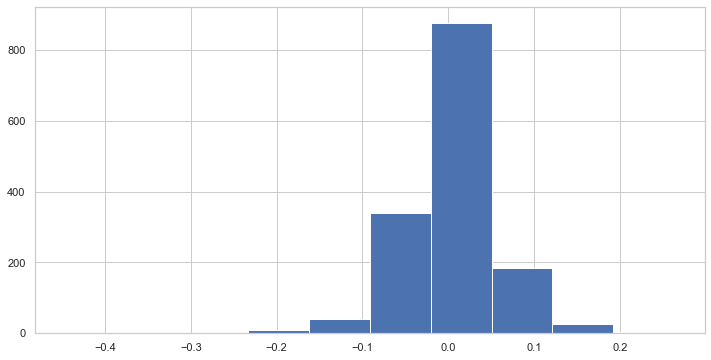

In [15]:
#While the closing price is heavily skewed, we see here that the return is normally distributed
eth['return'].hist()

<AxesSubplot:ylabel='Density'>

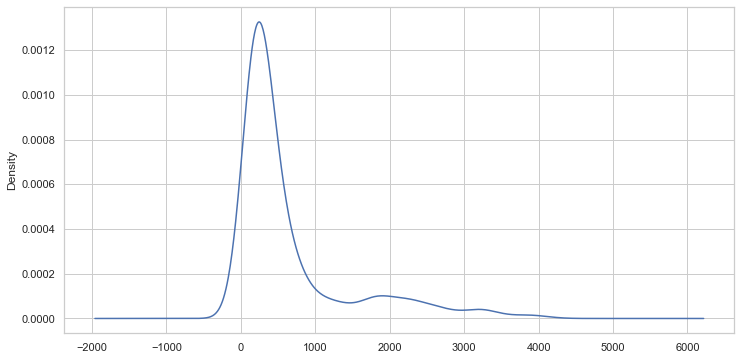

In [16]:
eth['close'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

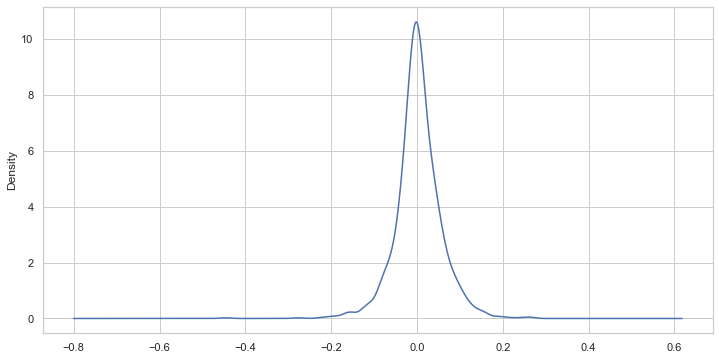

In [17]:
#at this point I'm screwing around a bit with plots, examing the kernel density
eth['return'].plot(kind = 'kde')

C:\Users\wfara\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

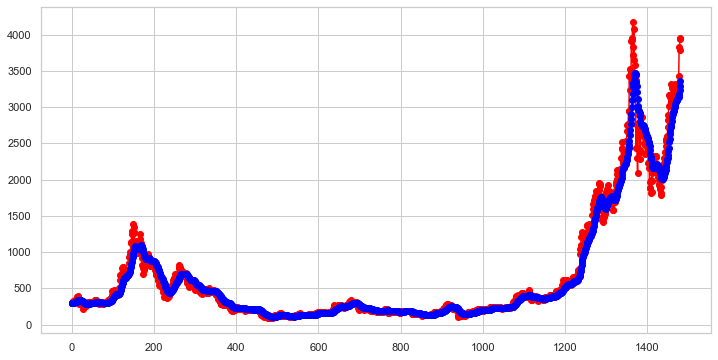

In [18]:
#exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(eth['close']).fit(smoothing_level = 0.1, optimized = False)

eth['close'].plot(marker = 'o', color = 'red')
model.fittedvalues.plot(marker = 'o', color ='blue')

In [23]:
#That does quite well!

cpi = pd.read_csv('RATEINF-CPI_USA.csv')
cpi.head()

,Date,Value
0,2021-08-31,273.57
1,2021-07-31,273.00
2,2021-06-30,271.70
3,2021-05-31,269.19
4,2021-04-30,267.05


In [26]:
cpi.set_index('Date')

,Value
Date,
2021-08-31,273.57
2021-07-31,273.00
2021-06-30,271.70
2021-05-31,269.19
2021-04-30,267.05
...,...
1913-05-31,9.70
1913-04-30,9.80
1913-03-31,9.80


In [27]:
cpi = cpi[(cpi['Date'] >= '2017-08-31')]

In [47]:

cpi = cpi.iloc[::-1]
cpi.head()
cpi.reset_index()
cpi.set_index('Date')

,Value
Date,
2017-08-31,245.52
2017-09-30,246.82
2017-10-31,246.66
2017-11-30,246.67
2017-12-31,246.52
2018-01-31,247.87
2018-02-28,248.99
2018-03-31,249.55
2018-04-30,250.55


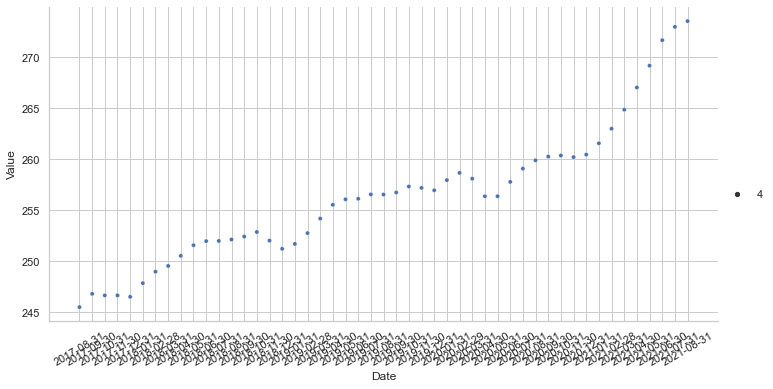

In [54]:
ax = sns.relplot(x='Date', y = 'Value', data = cpi, kind = 'scatter', size = 4, aspect = 2)
ax.set_xticklabels(rotation=30)
plt.show()

C:\Users\wfara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


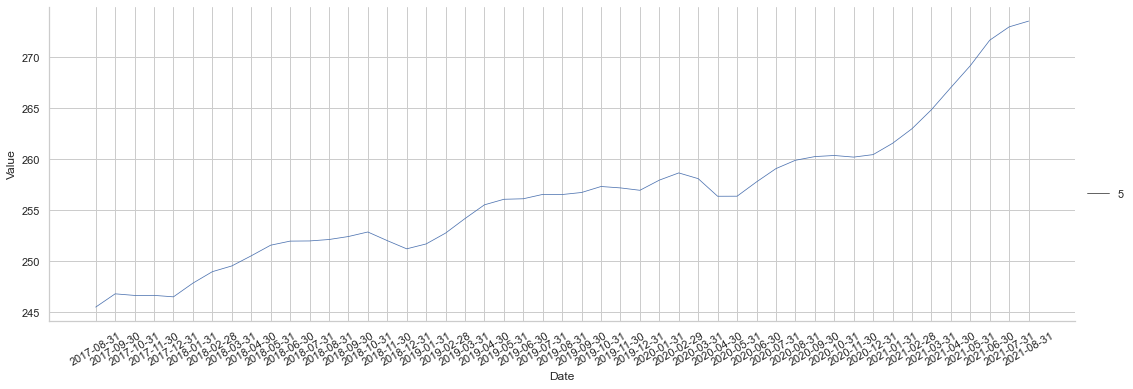

In [56]:
ax = sns.relplot('Date','Value', data =cpi, kind='line', size =5, aspect =3)
ax.set_xticklabels(rotation=30)
plt.show()

In [69]:
cpi.reset_index()
cpi.set_index('date')
cpi['date'] = pd.to_datetime(cpi.date)

In [73]:
merge = pd.merge(eth, cpi, how ='outer', on ='date')

In [105]:
merge.head()

,date,open,high,low,close,volume_ETH,volume_USDT,return,cpi
0,2017-08-17,303.61,312.18,298.21,302.00,6155.32,1890017.53,NaN,NaN
1,2017-08-18,302.00,311.79,283.94,293.96,9392.79,2815460.24,-0.03,NaN
2,2017-08-19,293.96,299.90,278.00,290.91,2140.08,618248.58,-0.01,NaN
3,2017-08-20,290.91,300.53,282.85,299.10,2469.49,730800.66,0.03,NaN
4,2017-08-21,299.10,346.52,294.60,323.29,5134.54,1661944.36,0.08,NaN


In [78]:
merge = merge.rename(columns = {'Value': 'cpi'})

In [110]:
smerge = merge.fillna(merge.median())

smerge

<ipython-input-110-d0a69e93aa94>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  smerge = merge.fillna(merge.median())


,date,open,high,low,close,volume_ETH,volume_USDT,return,cpi
0,2017-08-17,303.61,312.18,298.21,302.00,6155.32,1890017.53,0.00,256.39
1,2017-08-18,302.00,311.79,283.94,293.96,9392.79,2815460.24,-0.03,256.39
2,2017-08-19,293.96,299.90,278.00,290.91,2140.08,618248.58,-0.01,256.39
3,2017-08-20,290.91,300.53,282.85,299.10,2469.49,730800.66,0.03,256.39
4,2017-08-21,299.10,346.52,294.60,323.29,5134.54,1661944.36,0.08,256.39
...,...,...,...,...,...,...,...,...,...
1476,2021-08-31,3229.14,3476.00,3188.77,3429.20,863071.13,2895209449.71,0.06,273.57
1477,2021-09-01,3429.19,3842.00,3382.22,3826.82,845759.96,3038498667.85,0.12,273.57
1478,2021-09-02,3826.82,3836.80,3717.04,3785.82,525165.80,1981758437.09,-0.01,273.57
1479,2021-09-03,3785.82,4027.88,3705.05,3938.11,655903.76,2557662974.33,0.04,273.57


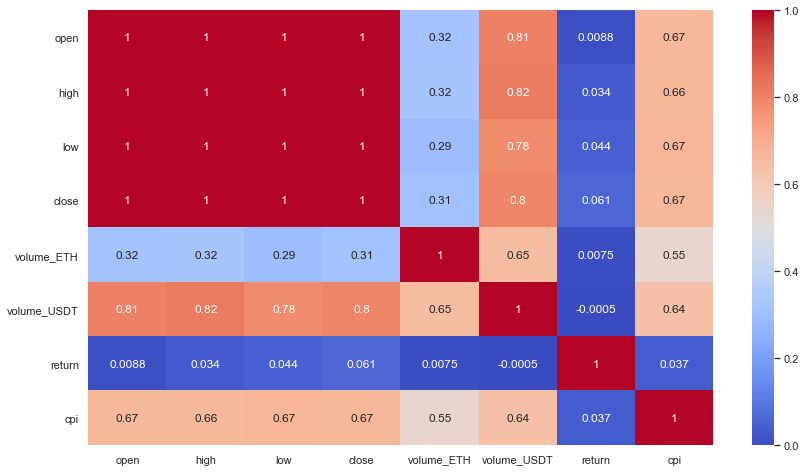

In [111]:
plt.figure(figsize=(14,8))
sns.heatmap(smerge.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);

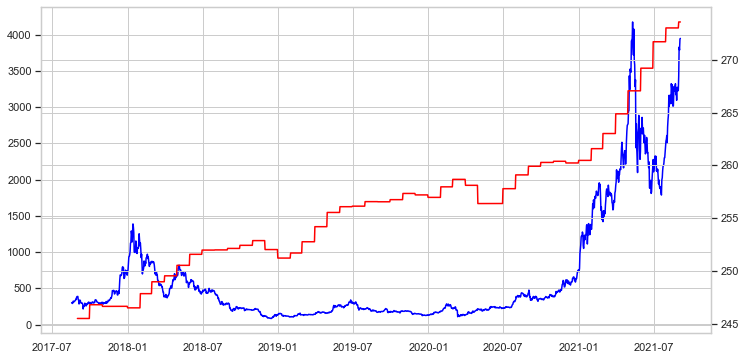

In [130]:
fig, ax = plt.subplots()

ax.plot(merge['date'], merge['close'], color = 'blue')

ax2 = ax.twinx()

ax2.plot(merge['date'], merge['cpi'], color = 'red')

plt.show()

In [126]:
inmerge = pd.merge(eth, cpi, how ='inner', on ='date')
inmerge

,date,open,high,low,close,volume_ETH,volume_USDT,return,Value
0,2017-08-31,385.93,389.36,377.78,384.79,4375.31,1681160.72,-0.00,245.52
1,2017-09-30,292.22,307.49,292.22,304.36,3997.83,1207595.88,0.04,246.82
2,2017-10-31,307.25,309.99,304.01,304.90,7631.45,2344790.92,-0.01,246.66
3,2017-11-30,421.70,460.00,387.01,427.43,44559.85,18862295.63,0.01,246.67
4,2017-12-31,680.01,740.00,672.86,733.98,62628.24,44570894.80,0.08,246.52
5,2018-01-31,1084.63,1135.00,1029.00,1124.81,100372.04,109226169.40,0.04,247.87
6,2018-02-28,871.84,891.00,850.30,853.50,53620.45,46744924.42,-0.02,248.99
7,2018-03-31,392.40,419.40,388.52,393.92,167833.59,67461541.59,0.00,249.55
8,2018-04-30,690.85,695.30,662.20,670.78,112494.92,76654028.98,-0.03,250.55
9,2018-05-31,557.87,586.73,552.98,577.81,100101.52,57312700.87,0.04,251.59


In [131]:
merge['cpi_change'] = merge['cpi'].pct_change()

merge

,date,open,high,low,close,volume_ETH,volume_USDT,return,cpi,cpi_change
0,2017-08-17,303.61,312.18,298.21,302.00,6155.32,1890017.53,NaN,NaN,NaN
1,2017-08-18,302.00,311.79,283.94,293.96,9392.79,2815460.24,-0.03,NaN,NaN
2,2017-08-19,293.96,299.90,278.00,290.91,2140.08,618248.58,-0.01,NaN,NaN
3,2017-08-20,290.91,300.53,282.85,299.10,2469.49,730800.66,0.03,NaN,NaN
4,2017-08-21,299.10,346.52,294.60,323.29,5134.54,1661944.36,0.08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1476,2021-08-31,3229.14,3476.00,3188.77,3429.20,863071.13,2895209449.71,0.06,273.57,0.00
1477,2021-09-01,3429.19,3842.00,3382.22,3826.82,845759.96,3038498667.85,0.12,273.57,0.00
1478,2021-09-02,3826.82,3836.80,3717.04,3785.82,525165.80,1981758437.09,-0.01,273.57,0.00
1479,2021-09-03,3785.82,4027.88,3705.05,3938.11,655903.76,2557662974.33,0.04,273.57,0.00


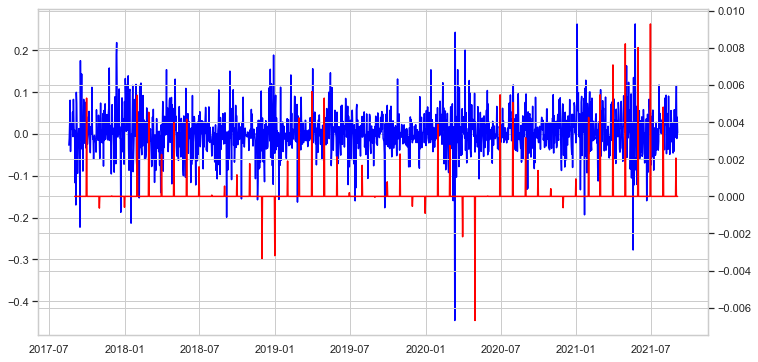

In [132]:
fig, ax = plt.subplots()

ax.plot(merge['date'], merge['return'], color = 'blue')

ax2 = ax.twinx()

ax2.plot(merge['date'], merge['cpi_change'], color = 'red')

plt.show()

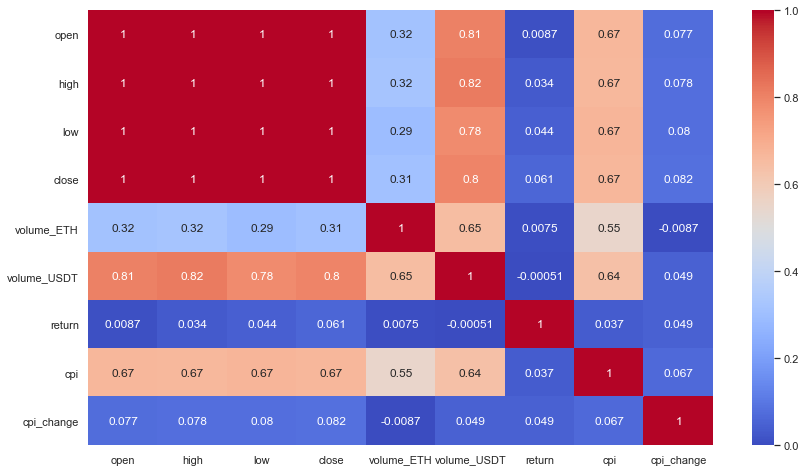

In [133]:
plt.figure(figsize=(14,8))
sns.heatmap(merge.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);

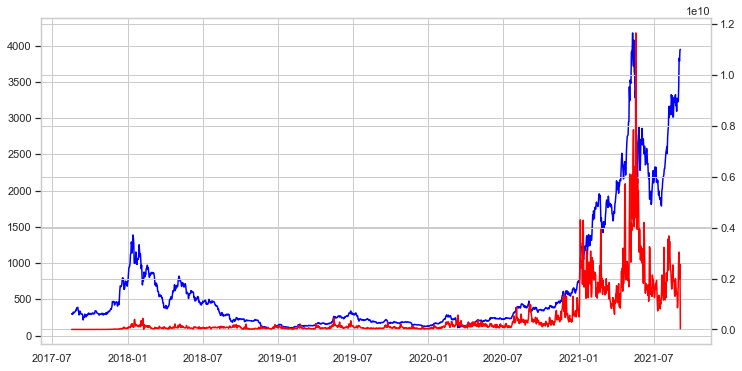

In [135]:
fig, ax = plt.subplots()

ax.plot(merge['date'], merge['close'], color = 'blue')

ax2 = ax.twinx()

ax2.plot(merge['date'], merge['volume_USDT'], color = 'red')

plt.show()

#it seems that the strongeset correlation lies in volume_USDT and closing price, however it seems worht noting that changes in cpi seem to correlate with the most drastic price swings in eth.